<a href="https://colab.research.google.com/github/Nischal5123/foreCache-interaction/blob/main/ActionStateAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#global path
global_drive_path="/content/drive/MyDrive/ForeCache/interactions/stateActionModel/"
    
          

In [ ]:
path=(str(global_drive_path) +"/ndsi-3d")
fileNames_NDSI_3D=[]
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        filePath=(os.path.join(path, filename))
        fileNames_NDSI_3D.append(filename)
    else:
        continue

In [ ]:
path=(str(global_drive_path) +"/ndsi-2d")
fileNames_NDSI_2D=[]
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        filePath=(os.path.join(path, filename))
        fileNames_NDSI_2D.append(filename)
    else:
        continue

In [ ]:
len(fileNames_NDSI_2D)

20

In [ ]:
fileNames_NDSI_3D[0][22:]

'userid_8b544d24-3274-4bb0-9719-fd2bccc87b02.csv'

In [ ]:
matchingName=[]
df_twoD=[]
df_threeD=[]
path_twoD=(str(global_drive_path) +"/ndsi-2d")
path_threeD=(str(global_drive_path) +"/ndsi-3d")
for i in range(len(fileNames_NDSI_2D)):
  for j in range(len(fileNames_NDSI_3D)):
  # if fileNames_NDSI_2D[i].removesuffix('taskname_ndsi-2d-task_') == fileNames_NDSI_3D[i].removesuffix('taskname_ndsi-3d-task_'):
   if fileNames_NDSI_2D[i][22:] == fileNames_NDSI_3D[j][22:]:
      #print(os.path.join(path, str(fileNames_NDSI_2D[i])))
      df=pd.read_csv(os.path.join(path_twoD, str(fileNames_NDSI_2D[i])),sep=',')
      df_twoD.append(df)
      df=pd.read_csv(os.path.join(path_threeD, str(fileNames_NDSI_3D[j])),sep=',')
      df_threeD.append(df)
      matchingName.append(fileNames_NDSI_2D[i])
      

In [ ]:
matchingName[0][22:-4:1]

'userid_ac5b65d7-f260-4534-9fae-d998b726ed32'

In [ ]:
#STORE ALL USERS NAME
users=[]
for name in matchingName:
    users.append(name[22:-4:1])

In [ ]:
#check for empty actions and states
for i in range(len(df_twoD)):
  df_twoD[i]=df_twoD[i].fillna('NAN')
  df_threeD[i]=df_threeD[i].fillna('NAN')

In [ ]:
#sanity check
for i in range(len(df_threeD)):
  print(df_threeD[i]["State"].unique())

['Foraging' 'Navigation' 'Sensemaking' 'NAN']
['Foraging' 'Navigation' 'Sensemaking' 'NAN']
['Foraging' 'Navigation' 'Sensemaking' 'NAN']
['Foraging' 'NAN' 'Navigation' 'Sensemaking']
['Foraging' 'Navigation' 'Sensemaking' 'NAN']
['Foraging' 'Navigation' 'Sensemaking' 'NAN']
['Foraging' 'Navigation' 'Sensemaking' 'NAN']
['Foraging' 'Navigation' 'Sensemaking' 'NAN']
['Foraging' 'Navigation' 'Sensemaking' 'NAN']
['Foraging' 'Navigation' 'Sensemaking' 'NAN']
['Foraging' 'Navigation' 'Sensemaking' 'NAN']
['Foraging' 'Navigation' 'Sensemaking' 'NAN']
['Foraging' 'Navigation' 'Sensemaking' 'NAN']
['Foraging' 'Navigation' 'Sensemaking' 'NAN']
['Foraging' 'Navigation' 'Sensemaking' 'NAN']
['Foraging' 'Navigation' 'Sensemaking' 'NAN']
['Foraging' 'Navigation' 'Sensemaking' 'NAN']


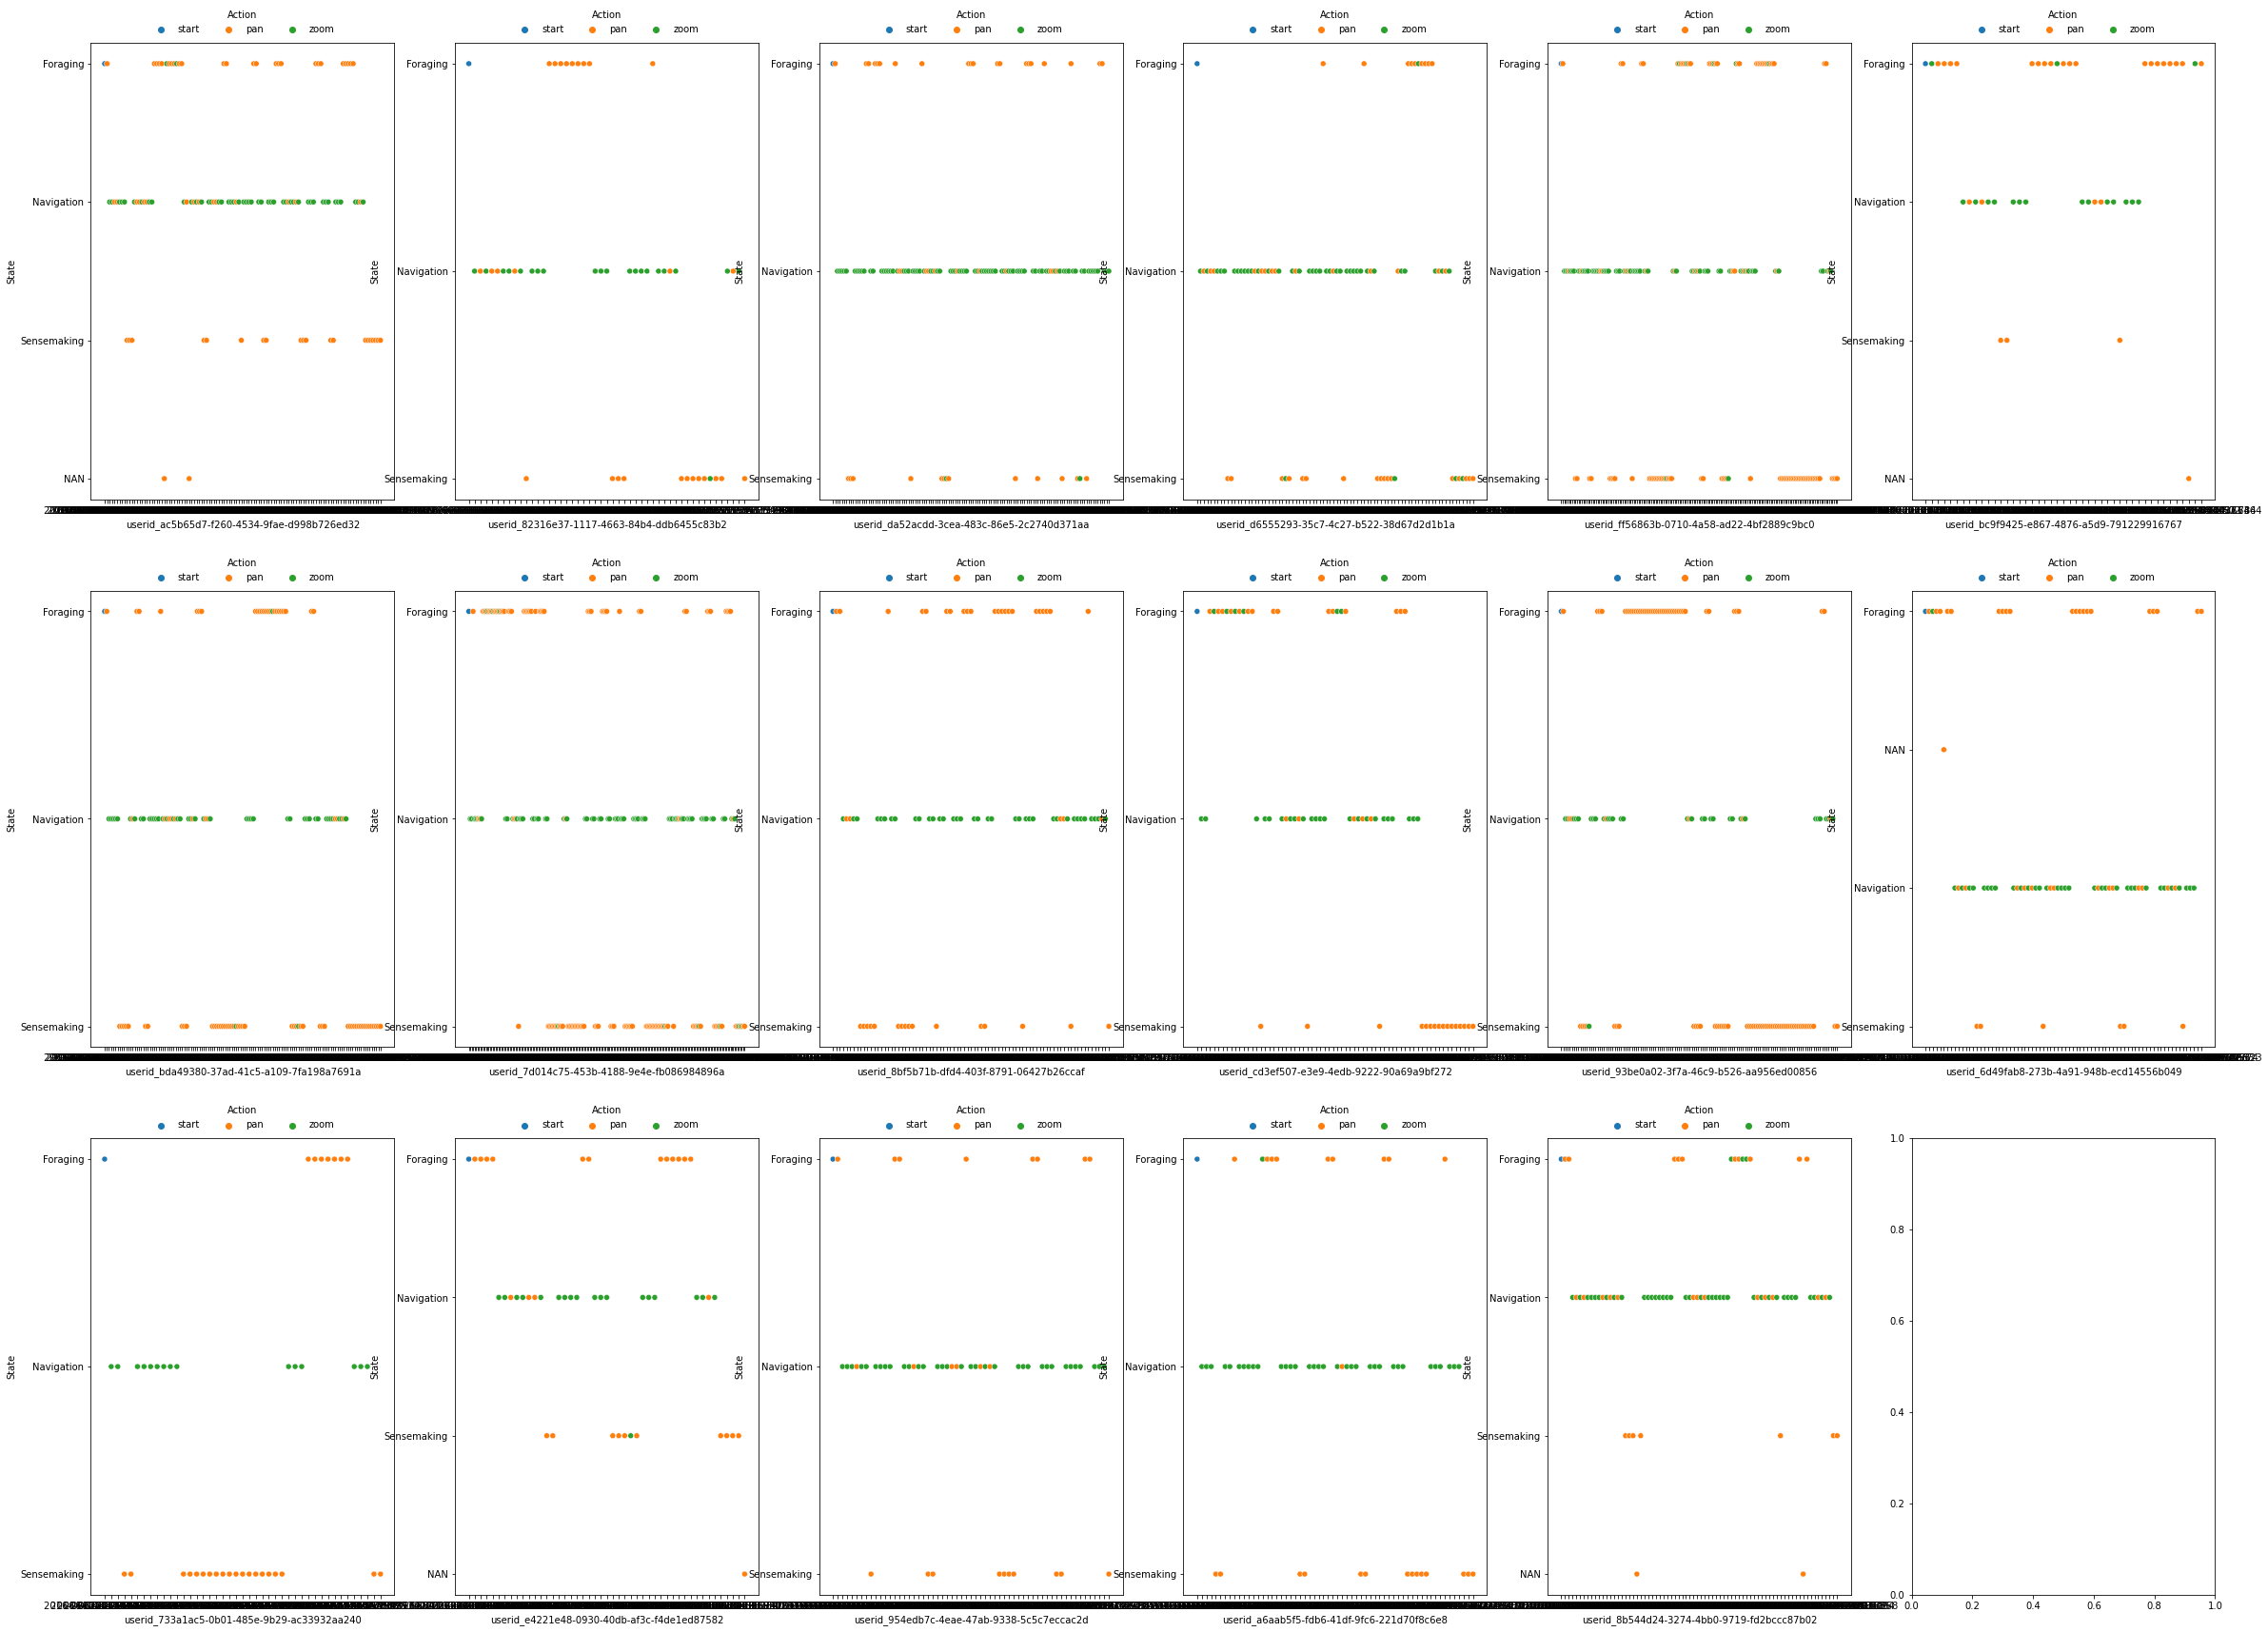

In [ ]:
#FOR NDSI-2D DATASET
#global hue 
hue_order=df_twoD[0]['Action'].unique()
#plot both together
fig, axes = plt.subplots(ncols=6, nrows=3,figsize=(40, 30))
for i, ax in zip(range(len(df_twoD)), axes.flat):
  sns.scatterplot(x=df_twoD[i]["TimeStamp"] ,y=df_twoD[i]["State"], hue=df_twoD[i]["Action"],hue_order=hue_order , ax=ax)
  sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=3, frameon=False)
  ax.set_xlabel(users[i])
   
plt.show()

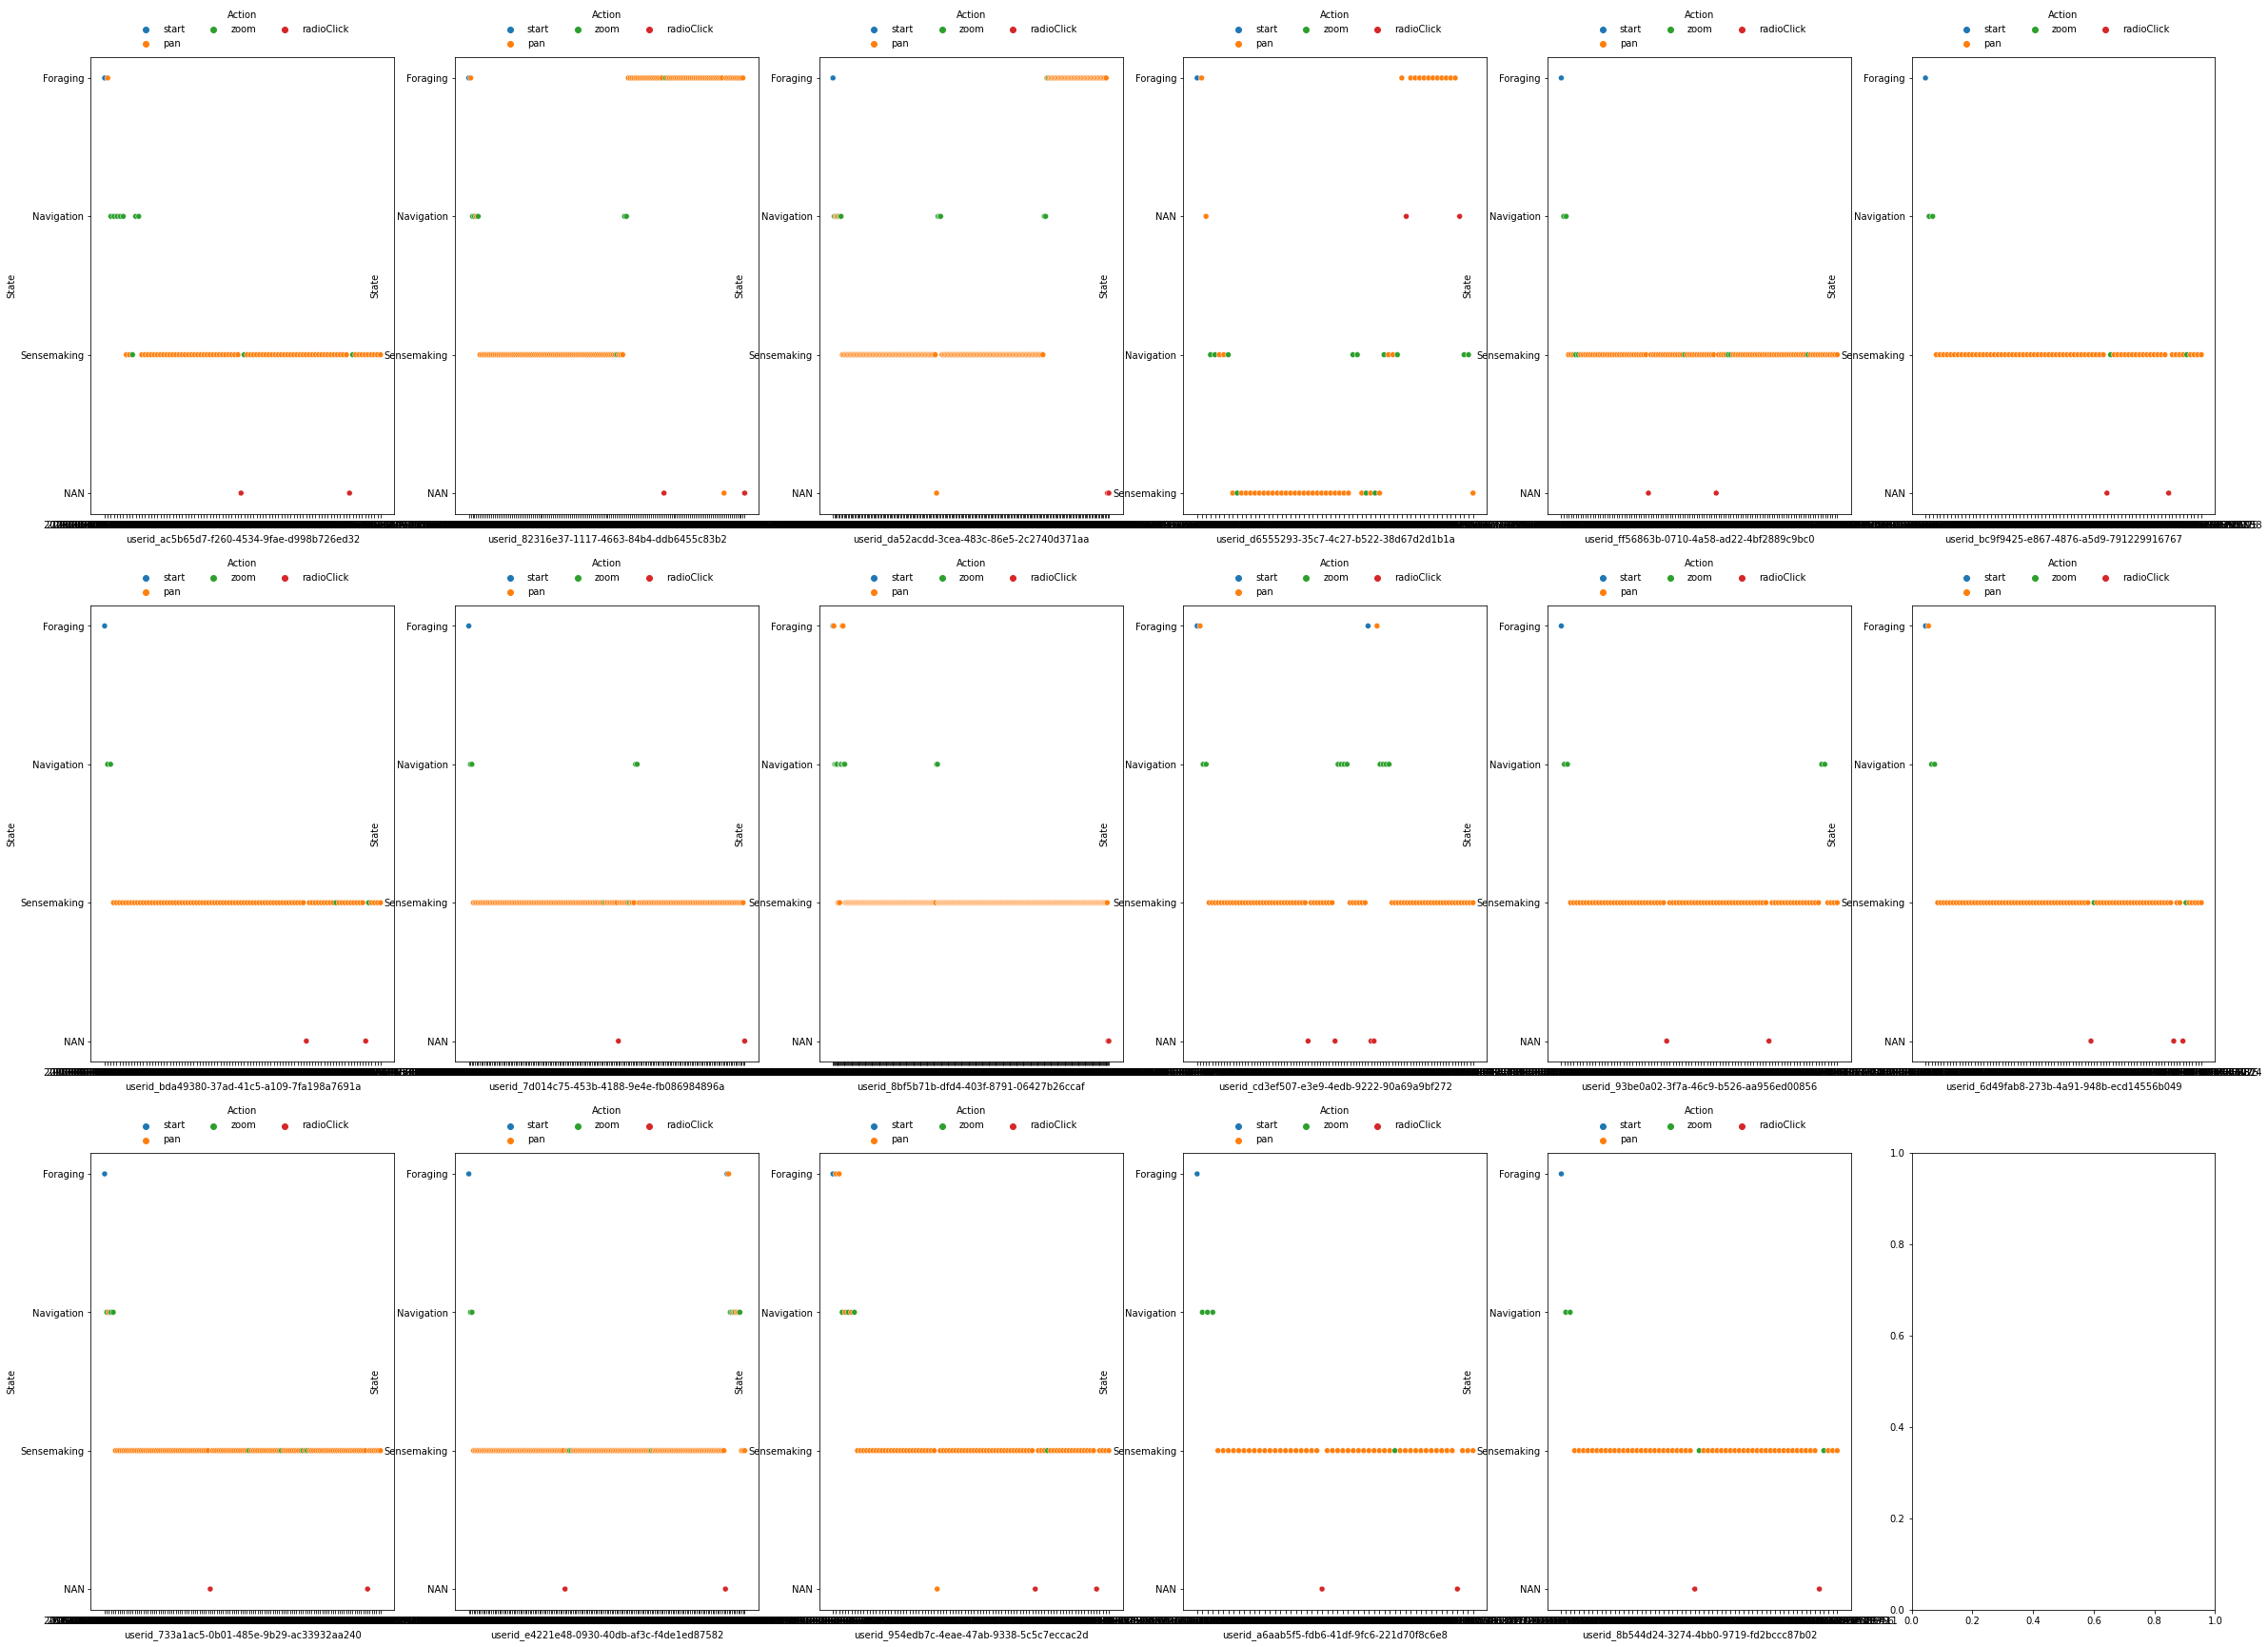

In [ ]:
#FOR NDSI-3D DATASET
#global hue 
hue_order=df_threeD[0]['Action'].unique() # need to set new hue because it has new Action RadioClick
fig, axes = plt.subplots(ncols=6, nrows=3,figsize=(40, 30))
for i, ax in zip(range(len(df_threeD)), axes.flat):
  sns.scatterplot(x=df_threeD[i]["TimeStamp"] ,y=df_threeD[i]["State"], hue=df_threeD[i]["Action"],hue_order=hue_order ,ax=ax)
  sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=3, frameon=False)
  ax.set_xlabel(users[i])

   
plt.show()

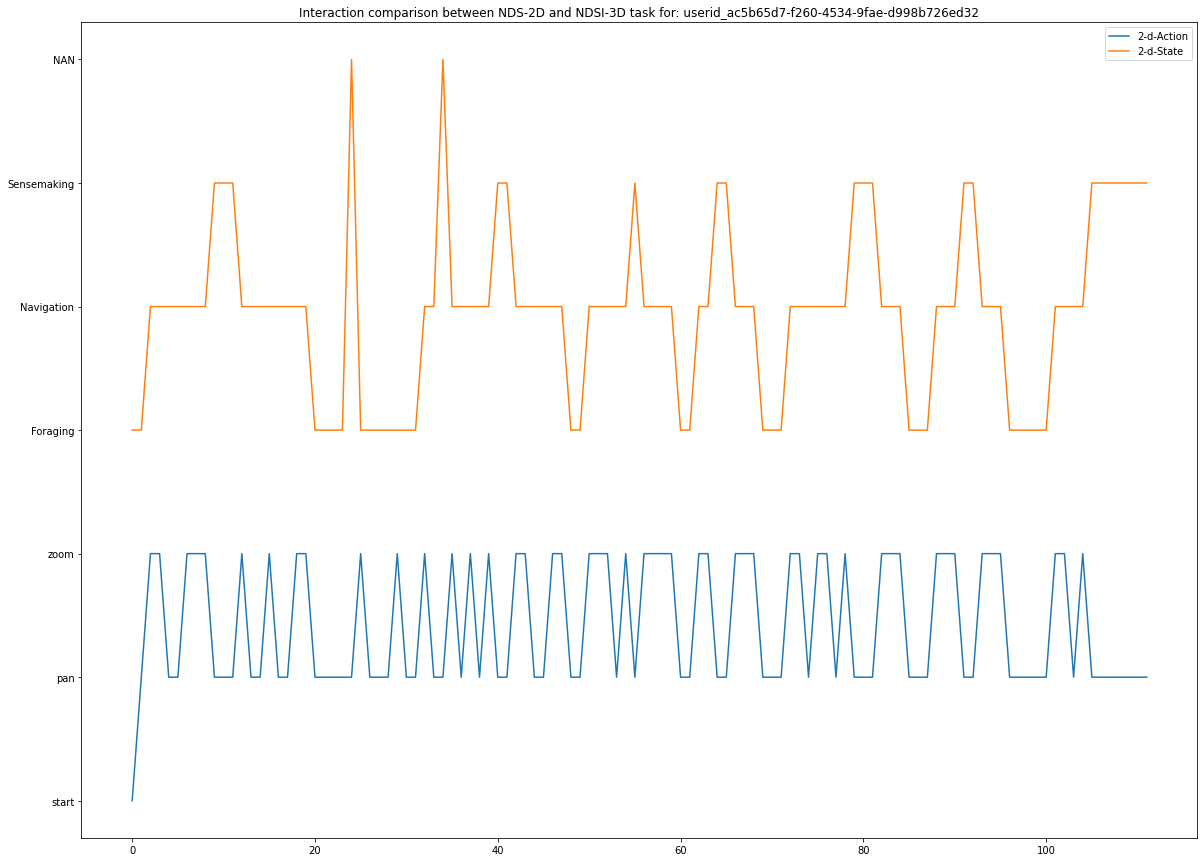

In [ ]:
import numpy as np
for i in range(1):
  #plot both together
  fig, ax = plt.subplots(figsize=(20, 15))
  plt.plot( list(range(0, len(df_twoD[i]["TimeStamp"]))),df_twoD[i]["Action"])
  plt.plot( list(range(0, len(df_twoD[i]["TimeStamp"]))),df_twoD[i]["State"])
  # plt.plot(list(range(0, len(df_threeD[i]["TimeStamp"]))),df_threeD[i]["Action"])
  # plt.plot(list(range(0, len(df_threeD[i]["TimeStamp"]))) ,df_threeD[i]["State"])
  plt.legend(['2-d-Action','2-d-State','3-d-Action','3-d-State'])
  plt.title("Interaction comparison between NDS-2D and NDSI-3D task for: " + str(users[i])) 
  plt.show()

In [ ]:
#difference in policies
import pandas as pd
policy_dataframe = pd.read_csv('Policies.txt', sep=",",names=['State','Action'])

FileNotFoundError: ignored

In [ ]:
ground_policy_dataframe = pd.read_csv('Ground Policies.csv', sep=",",names=['Action','State','Time','Angle'])

In [ ]:
ground_policy_dataframe.head(5)

,Action,State,Time,Angle
0,start,Foraging,2016-06-09 17:21:17.821,0.00000
1,pan,Foraging,2016-06-09 17:21:39.561,352.98249
2,zoom,Navigation,2016-06-09 17:21:41.290,0.00000
3,zoom,Navigation,2016-06-09 17:21:42.674,0.00000
4,zoom,Navigation,2016-06-09 17:21:43.859,0.00000


In [ ]:
policy_dataframe.replace(to_replace=0, value="pan", inplace=True)
policy_dataframe.replace(to_replace=1, value="zoom", inplace=True)
policy_dataframe.replace(to_replace=2, value="start", inplace=True)
policy_dataframe.replace(to_replace=3, value="radioClick", inplace=True)

Text(0.5, 1.0, 'Ground States')

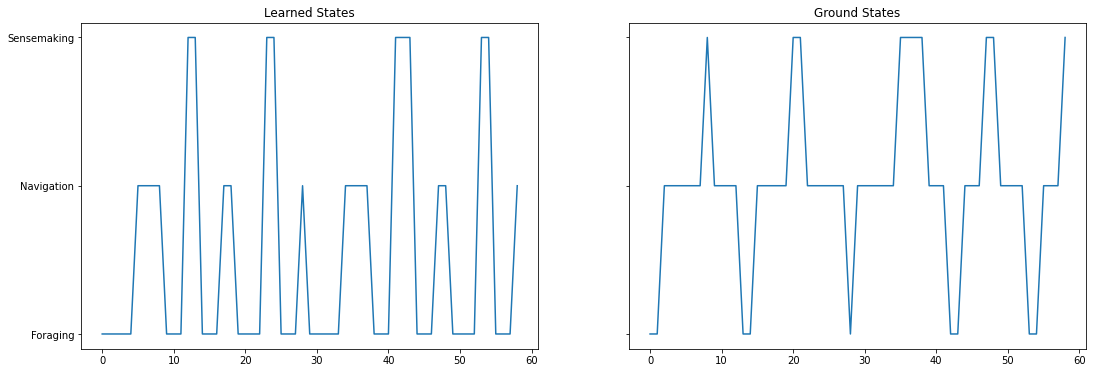

In [ ]:
# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(18, 6))
x=list(range(0, len(policy_dataframe)))
ax1.plot(x, policy_dataframe["State"])
ax1.set_title('Learned States')
ax2.plot(x, ground_policy_dataframe["State"])
ax2.set_title('Ground States')


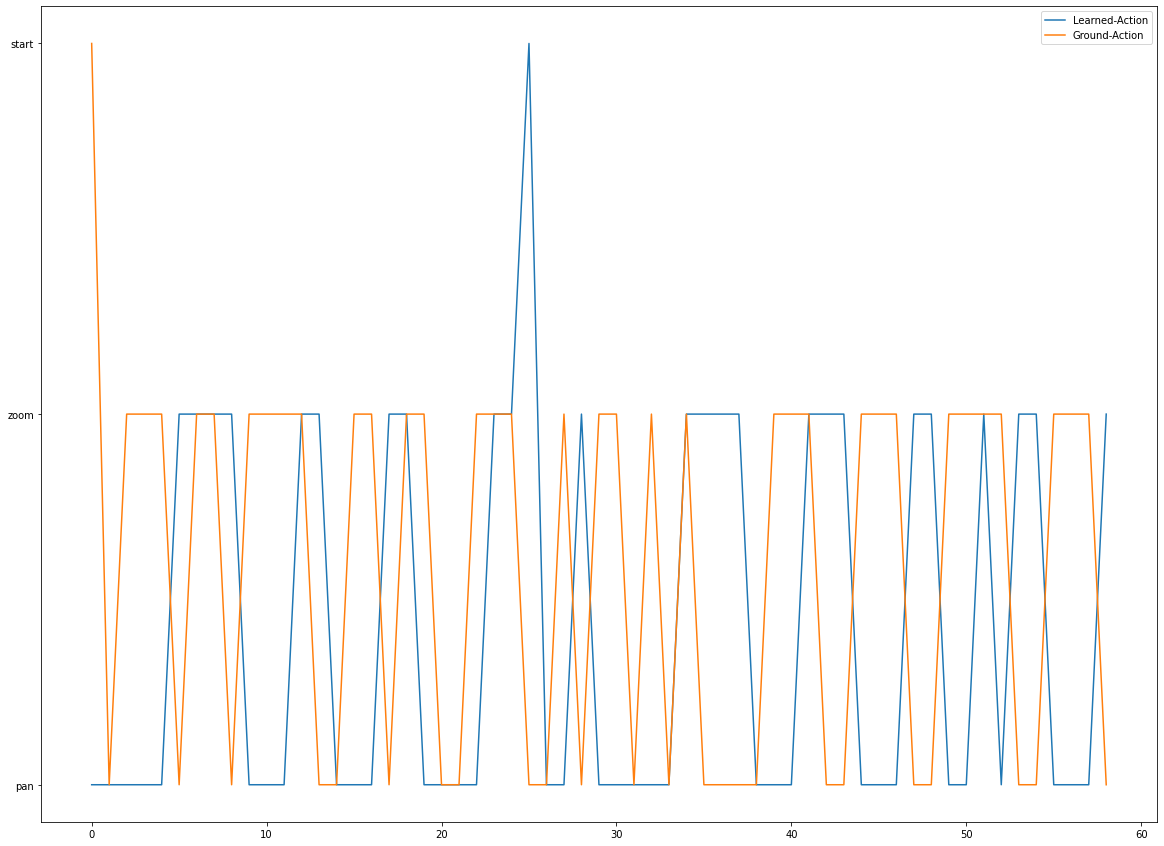

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))
plt.plot( list(range(0, len(policy_dataframe))),policy_dataframe["Action"])
plt.plot( list(range(0, len(ground_policy_dataframe))),ground_policy_dataframe["Action"])
plt.legend(['Learned-Action','Ground-Action'])

In [ ]:
initialPolicy=policy_dataframe[:29]

In [ ]:
laterPolicy=policy_dataframe[31:]

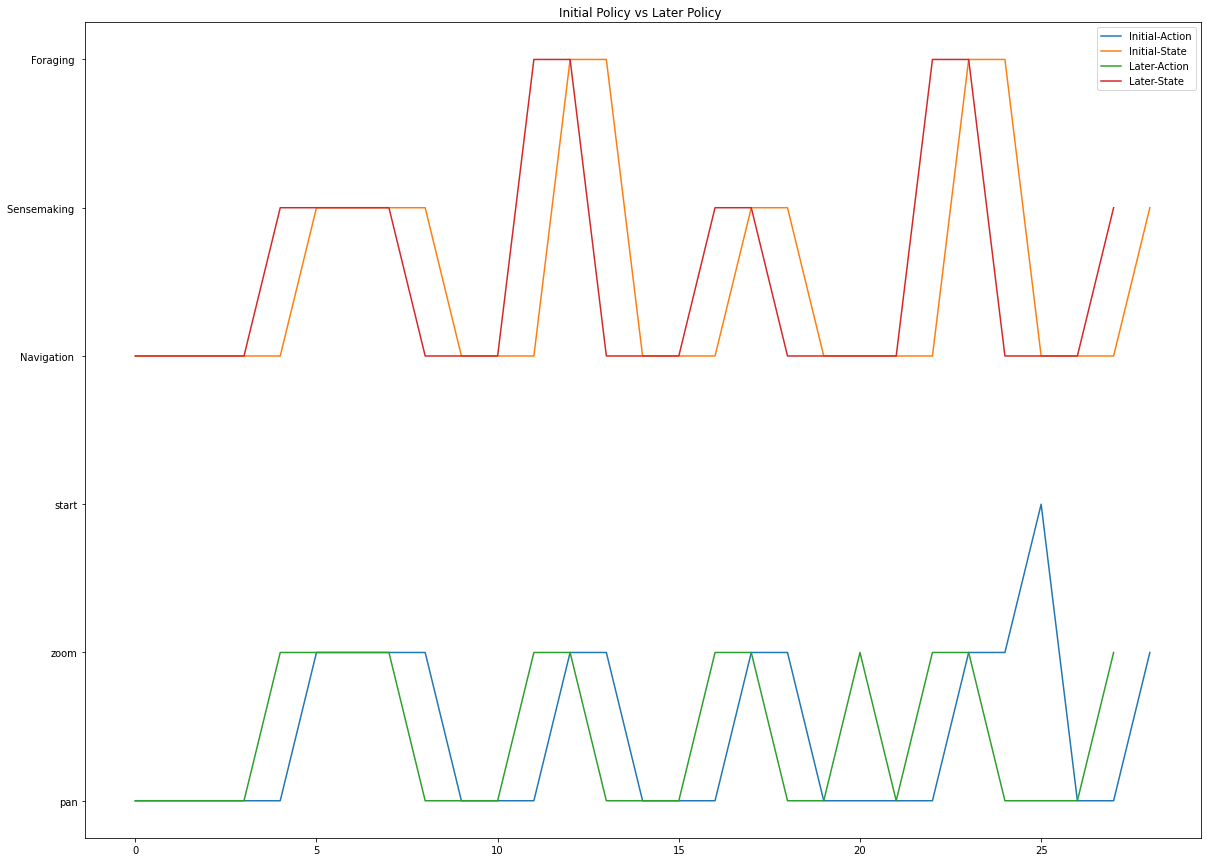

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))
plt.plot( list(range(0, len(initialPolicy))),initialPolicy["Action"])
plt.plot( list(range(0, len(initialPolicy))),initialPolicy["State"])
plt.plot( list(range(0, len(laterPolicy))),laterPolicy["Action"])
plt.plot( list(range(0, len(laterPolicy))),laterPolicy["State"])
plt.legend(['Initial-Action','Initial-State','Later-Action','Later-State'])
plt.title("Initial Policy vs Later Policy ") 
plt.show()

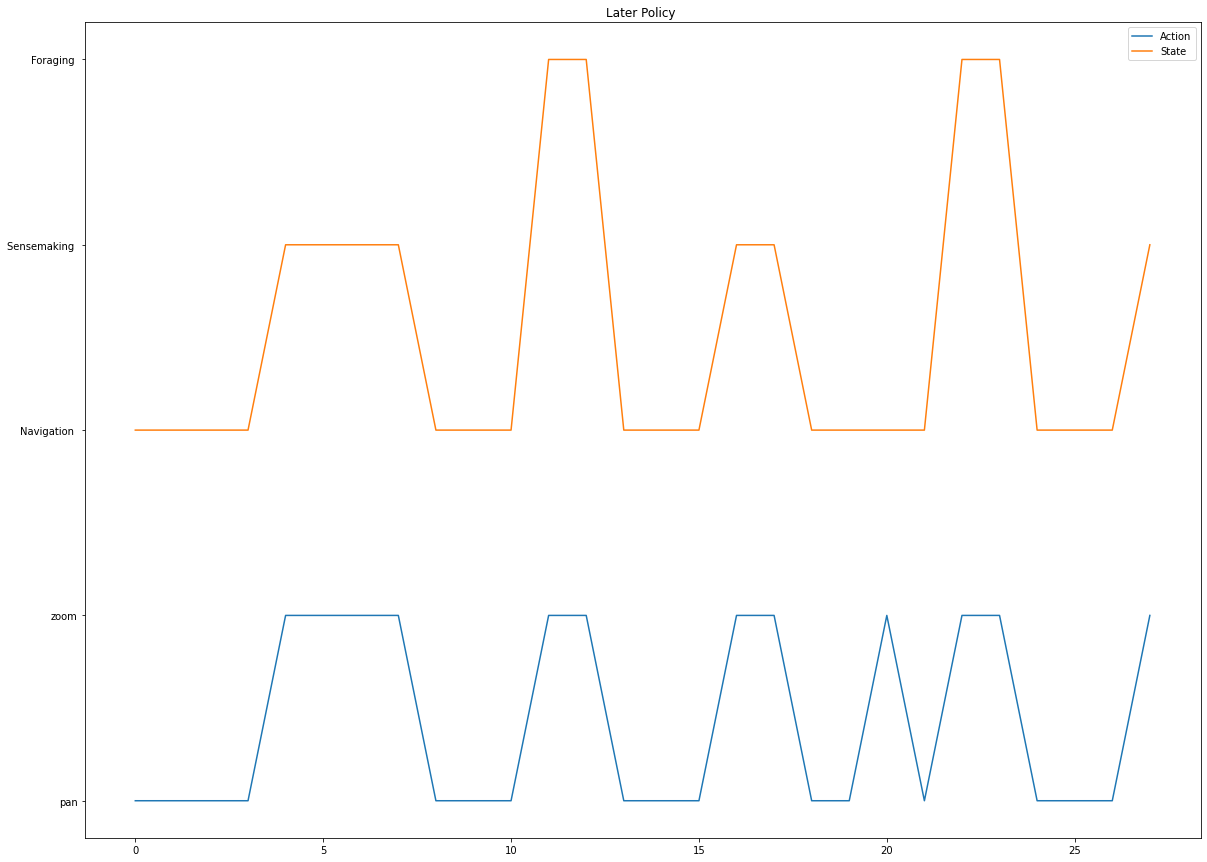

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))
plt.plot( list(range(0, len(laterPolicy))),laterPolicy["Action"])
plt.plot( list(range(0, len(laterPolicy))),laterPolicy["State"])
plt.legend(['Action','State'])
plt.title("Later Policy ") 
plt.show()

Text(0.5, 1.0, 'Ground Action')

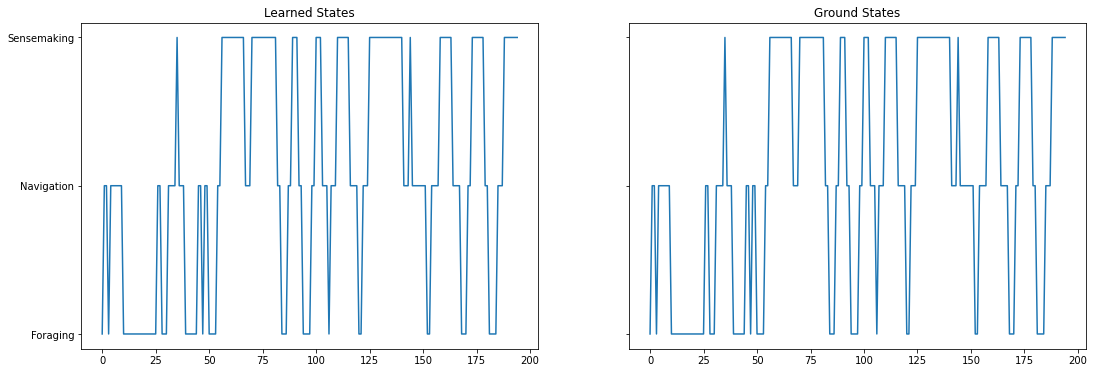

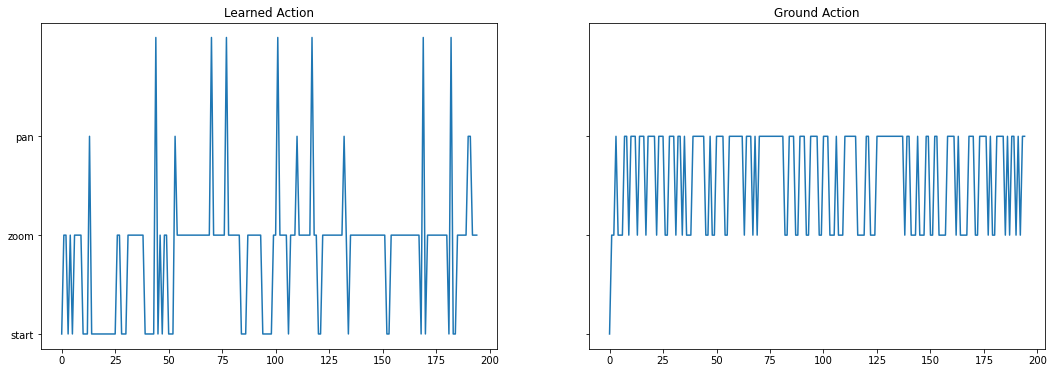

In [ ]:
#difference in policies
#USER: 7d014c75-453b-4188-9e4e-fb086984896a
import matplotlib.pyplot as plt
import pandas as pd
policy_dataframe = pd.read_csv('LearnedPolicy.txt', sep=",",names=['State','Action'])
ground_policy_dataframe = pd.read_csv('Ground_Policies_2.csv', sep=",")


#changing 0,1,2,3 to real action values.
policy_dataframe.replace(to_replace=0, value="pan", inplace=True)
policy_dataframe.replace(to_replace=1, value="zoom", inplace=True)
policy_dataframe.replace(to_replace=2, value="start", inplace=True)
policy_dataframe.replace(to_replace=3, value="radioClick", inplace=True)

# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(18, 6))
x=list(range(0, len(policy_dataframe)))
ax1.plot(x, policy_dataframe["State"])
ax1.set_title('Learned States')
ax2.plot(x, ground_policy_dataframe["State"])
ax2.set_title('Ground States')

#Actions
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(18, 6))
x=list(range(0, len(policy_dataframe)))
ax1.plot(x, policy_dataframe["Action"])
ax1.set_title('Learned Action')
ax2.plot(x, ground_policy_dataframe["Action"])
ax2.set_title('Ground Action')
# fig, ax = plt.subplots(figsize=(20, 15))
# plt.plot( list(range(0, len(policy_dataframe))),policy_dataframe["Action"])
# plt.plot( list(range(0, len(ground_policy_dataframe))),ground_policy_dataframe["Action"])
# plt.legend(['Learned-Action','Ground-Action'])

In [ ]:
round(len(policy_dataframe)/2)

98

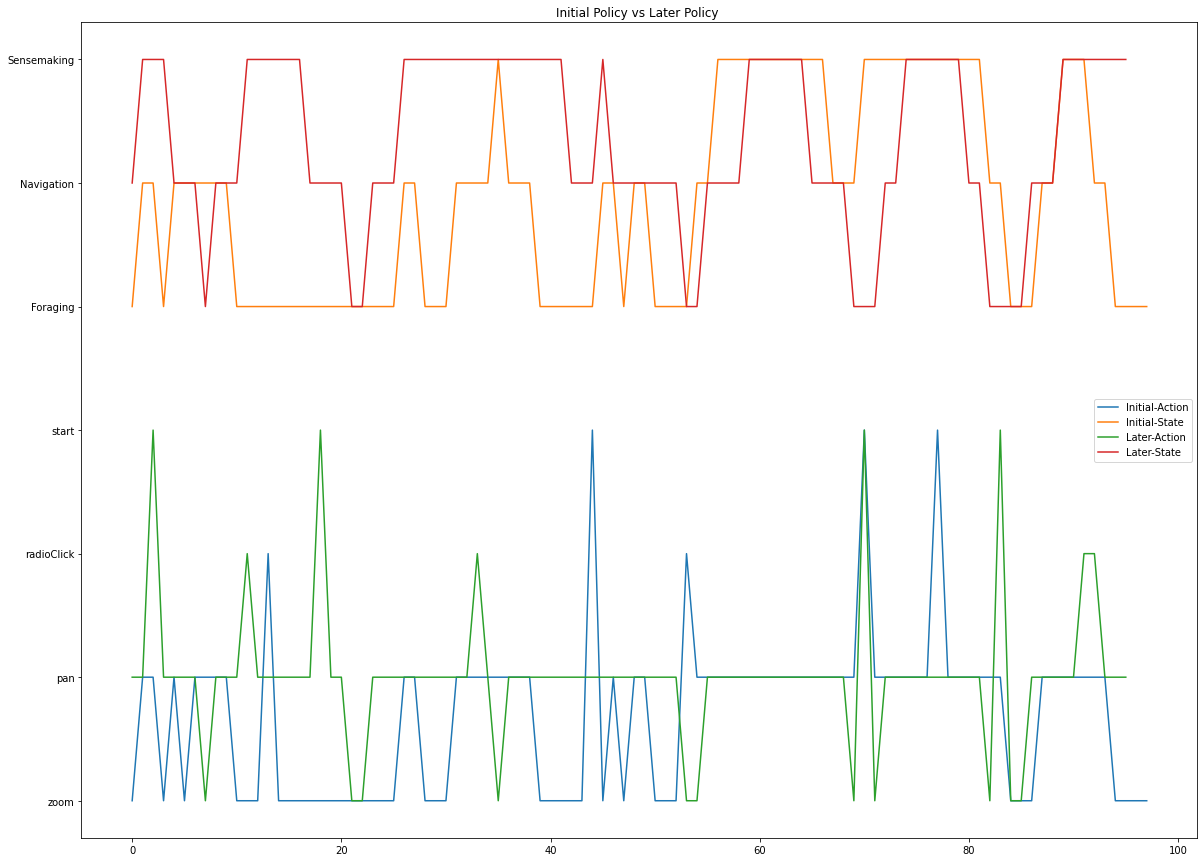

In [ ]:
size=len(policy_dataframe)
initialPolicy=policy_dataframe[:round(size/2)]
laterPolicy=policy_dataframe[(round(size/2))+1:]
fig, ax = plt.subplots(figsize=(20, 15))
plt.plot( list(range(0, len(initialPolicy))),initialPolicy["Action"])
plt.plot( list(range(0, len(initialPolicy))),initialPolicy["State"])
plt.plot( list(range(0, len(laterPolicy))),laterPolicy["Action"])
plt.plot( list(range(0, len(laterPolicy))),laterPolicy["State"])
plt.legend(['Initial-Action','Initial-State','Later-Action','Later-State'])
plt.title("Initial Policy vs Later Policy ") 
plt.show()


In [ ]:
import numpy as np
values, counts = np.unique(initialPolicy["Action"], return_counts=True)
print(values)
print(counts)

print("State Counts")


['pan' 'radioClick' 'start' 'zoom']
[55  2  3 38]


In [ ]:
values, counts = np.unique(laterPolicy["Action"], return_counts=True)
print(values)
print(counts)

['pan' 'radioClick' 'start' 'zoom']
[77  4  4 11]
